# Importation des packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import make_regression 
from sklearn.linear_model import SGDRegressor

# Générer un dataset aléatoire 

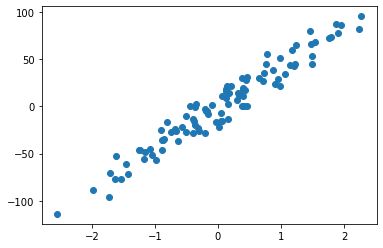

In [3]:
np.random.seed(0) # pour toujours reproduire le meme dataset
x, y = make_regression(n_samples=100, n_features=1, noise=10)
plt.scatter(x, y) # afficher les résultats. X en abscisse et y en ordonnée

In [4]:
print(x.shape)
print(y.shape)

# redimensionner y
y = y.reshape(y.shape[0], 1)

print(y.shape)

(100, 1)
(100,)
(100, 1)


In [16]:
X = np.hstack((x, np.ones(x.shape)))
print(X.shape)
X

(100, 2)


array([[-0.35955316,  1.        ],
       [ 0.97663904,  1.        ],
       [ 0.40234164,  1.        ],
       [-0.81314628,  1.        ],
       [-0.88778575,  1.        ],
       [ 0.44386323,  1.        ],
       [-0.97727788,  1.        ],
       [ 0.42833187,  1.        ],
       [ 0.20827498,  1.        ],
       [-0.31155253,  1.        ],
       [-0.51080514,  1.        ],
       [ 0.12691209,  1.        ],
       [-1.53624369,  1.        ],
       [-0.40178094,  1.        ],
       [ 0.6536186 ,  1.        ],
       [ 1.17877957,  1.        ],
       [-0.17992484,  1.        ],
       [ 1.78587049,  1.        ],
       [ 1.45427351,  1.        ],
       [-0.68481009,  1.        ],
       [ 0.97873798,  1.        ],
       [ 1.89588918,  1.        ],
       [-0.4380743 ,  1.        ],
       [ 0.3130677 ,  1.        ],
       [ 0.76103773,  1.        ],
       [ 0.77749036,  1.        ],
       [ 1.9507754 ,  1.        ],
       [ 0.33367433,  1.        ],
       [-0.34791215,

In [6]:
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(2, 1)
theta

array([[1.76405235],
       [0.40015721]])

# Construction du modele

In [7]:
def model(X, theta):
    return X.dot(theta)

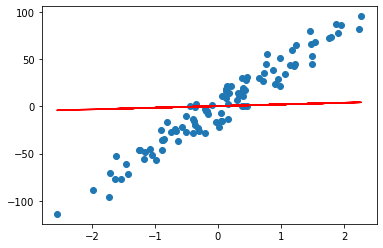

In [8]:
plt.scatter(x, y)
plt.plot(x, model(X, theta), c='r')

# Fonction cout

A travers cette fonction, on va calculer l'erreur commise par notre modele

In [9]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [22]:
cost_function(X, y, theta)

905.6306841935502

# Calcul du gradient

In [11]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# Calcul de la descente gradient

In [12]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [13]:
n_iterations = 1000
learning_rate = 0.01


theta_final, cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)

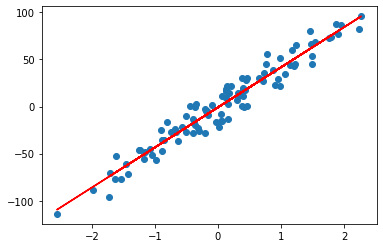

In [14]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.plot(x, predictions, c='r')

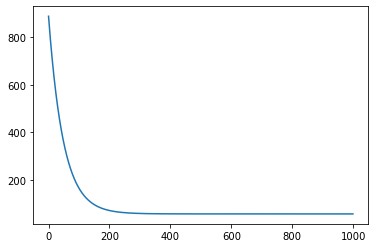

In [15]:
plt.plot(range(n_iterations), cost_history)

# Evaluation du modele

In [26]:
def coeff_determination(y,pred):
    u=((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1-u/v

In [27]:
coeff_determination(y,predictions)

0.9417294706504984